In [14]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(repr.matrix.max.rows = 8)
options(tibble.print_min = 6)

library(ggthemr)
ggthemr("light") #, layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

In [2]:
acad0 <- read_csv("data/c0301dt.csv")

Rows: 15 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): time, pubs, salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
acad0

time,pubs,salary
<dbl>,<dbl>,<dbl>
3,18,51876
6,3,54511
3,2,53425
8,17,61863
⋮,⋮,⋮
6,21,47047
7,10,39115
11,27,59677
18,37,61458


In [4]:
# create a linear model with time as the predictor time, and the outcome being the salary
# the model is called mod1
mod1 <- lm(salary ~ time, data = acad0)

# print the model
mod1

# print the model summary
summary(mod1)



Call:
lm(formula = salary ~ time, data = acad0)

Coefficients:
(Intercept)         time  
      43659         1224  



Call:
lm(formula = salary ~ time, data = acad0)

Residuals:
     Min       1Q   Median       3Q      Max 
-13114.3  -3964.4     51.4   4025.1   8409.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43658.6     2978.0  14.660 1.83e-09 ***
time          1224.4      336.5   3.639    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5763 on 13 degrees of freedom
Multiple R-squared:  0.5046,	Adjusted R-squared:  0.4665 
F-statistic: 13.24 on 1 and 13 DF,  p-value: 0.003


In [7]:
# r squared of mod1 and round to 2 decimal places
round(summary(mod1)$r.squared, 2)


[1] 0.5

In [8]:
# correlation between all variables in acad0 with corr.test
# corr.test is a function from the psych package
library(psych)
corr.test(acad0)


다음의 패키지를 부착합니다: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Call:corr.test(x = acad0)
Correlation matrix 
       time pubs salary
time   1.00 0.66   0.71
pubs   0.66 1.00   0.59
salary 0.71 0.59   1.00
Sample Size 
[1] 15
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
       time pubs salary
time   0.00 0.02   0.01
pubs   0.01 0.00   0.02
salary 0.00 0.02   0.00

 To see confidence intervals of the correlations, print with the short=FALSE option

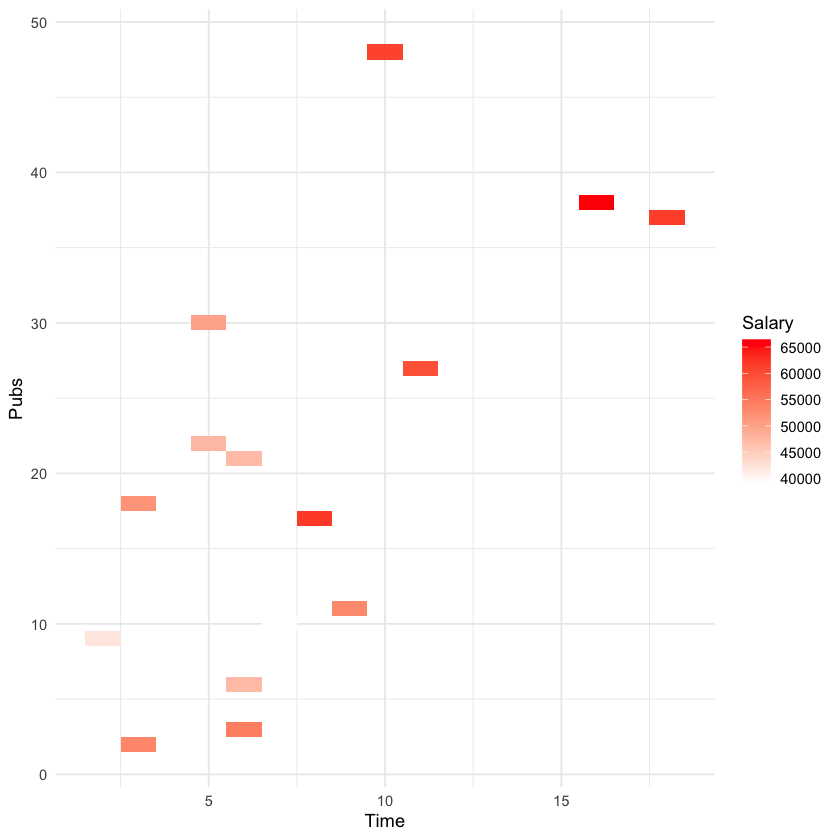

ERROR: Error in if (set.sign) {: argument is not interpretable as logical


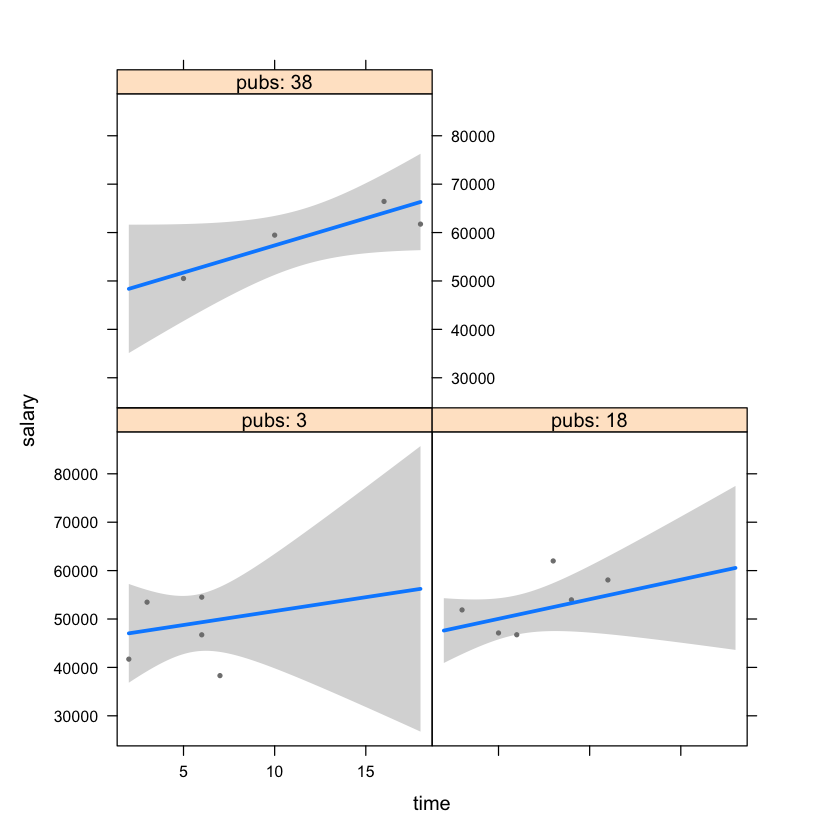

In [43]:
# buile a linear model with time an pubs as the predictor and salary as the outcome with interaction terms between time and pubs
mod2 <- lm(salary ~ time + pubs + time:pubs, data = acad0)

# visualize the interaction between time and pubs
ggplot(acad0, aes(x = time, y = pubs, fill = salary)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(x = "Time", y = "Pubs", fill = "Salary") +
  theme_minimal()

# visualize the interaction between time and pubs with a package visreg
library(visreg)
visreg(mod2, "time", "pubs")

# visualize the interaction between time and pubs with a package car using effects function
library(car)
effects(mod2, "time", "pubs")

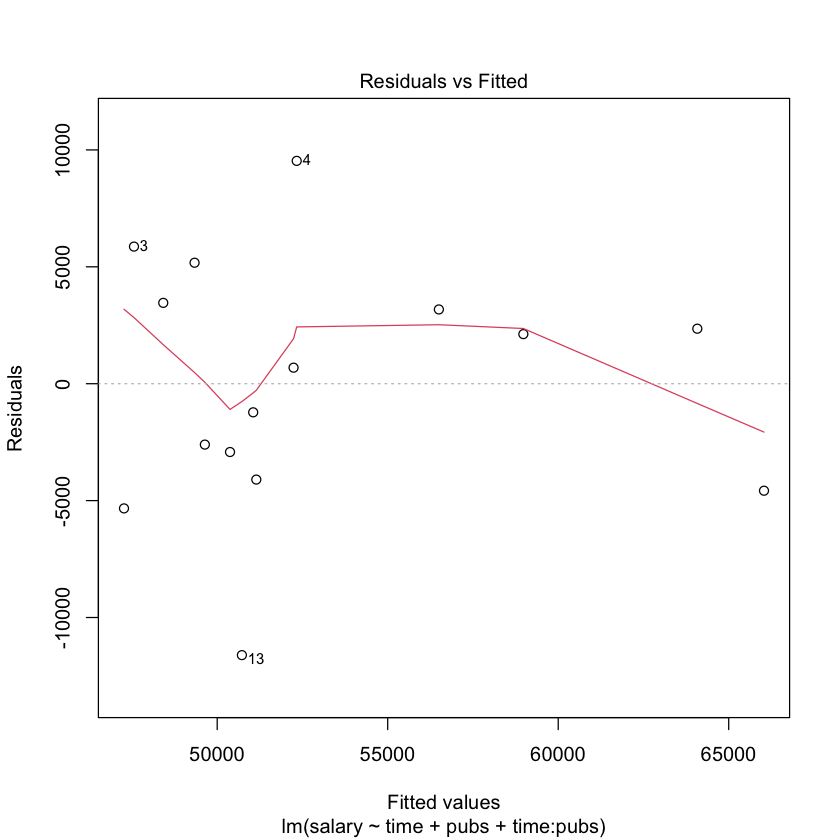

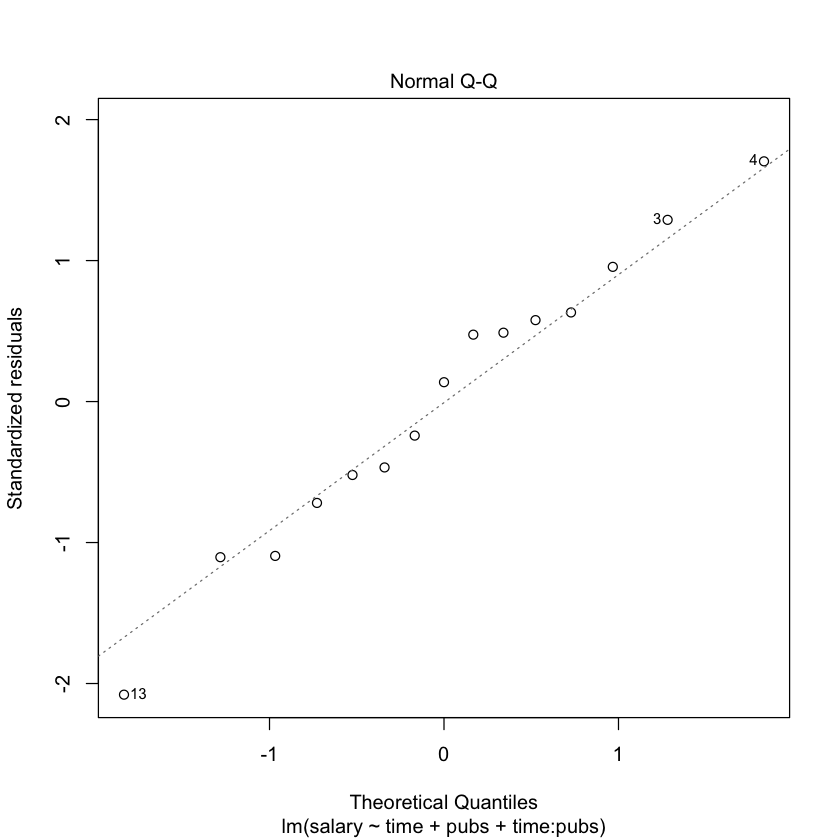

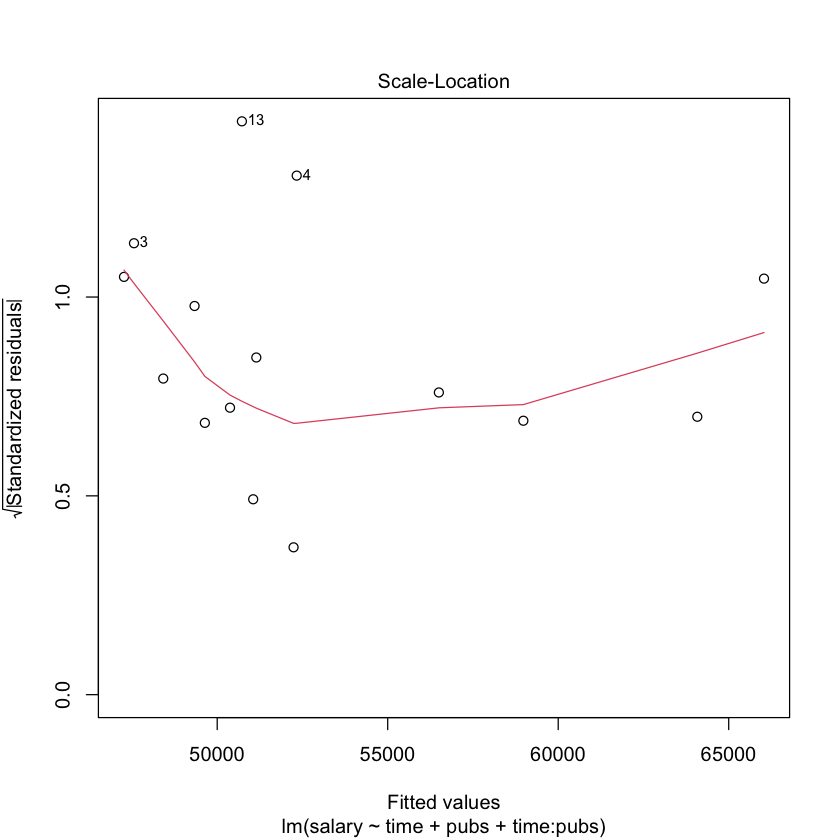

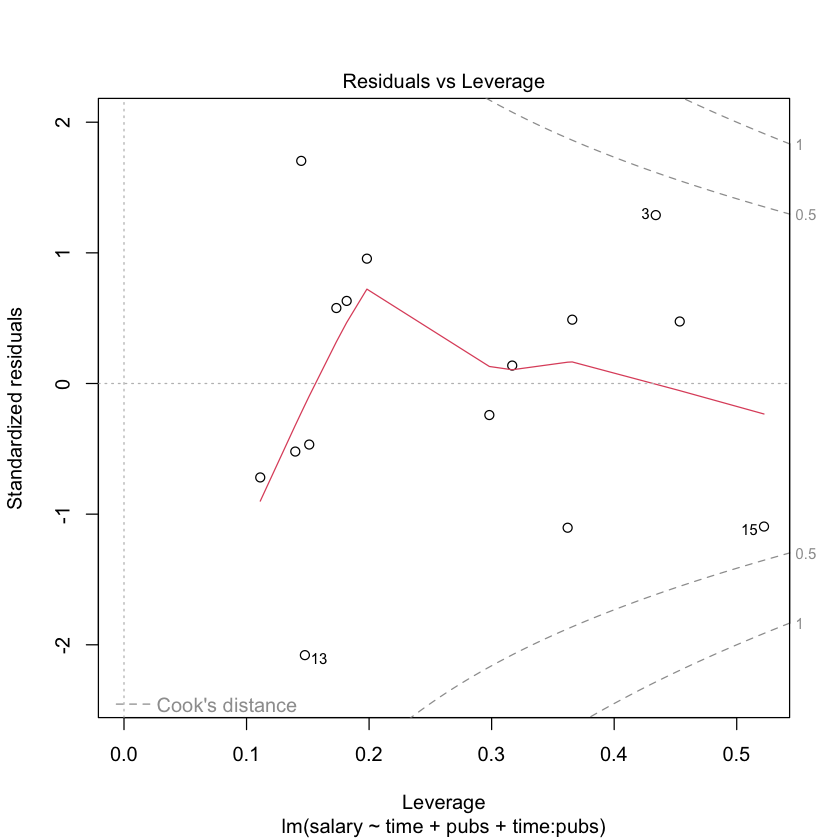

           Test stat Pr(>|Test stat|)
time         -0.9563           0.3615
pubs          0.6334           0.5407
Tukey test   -1.1784           0.2386


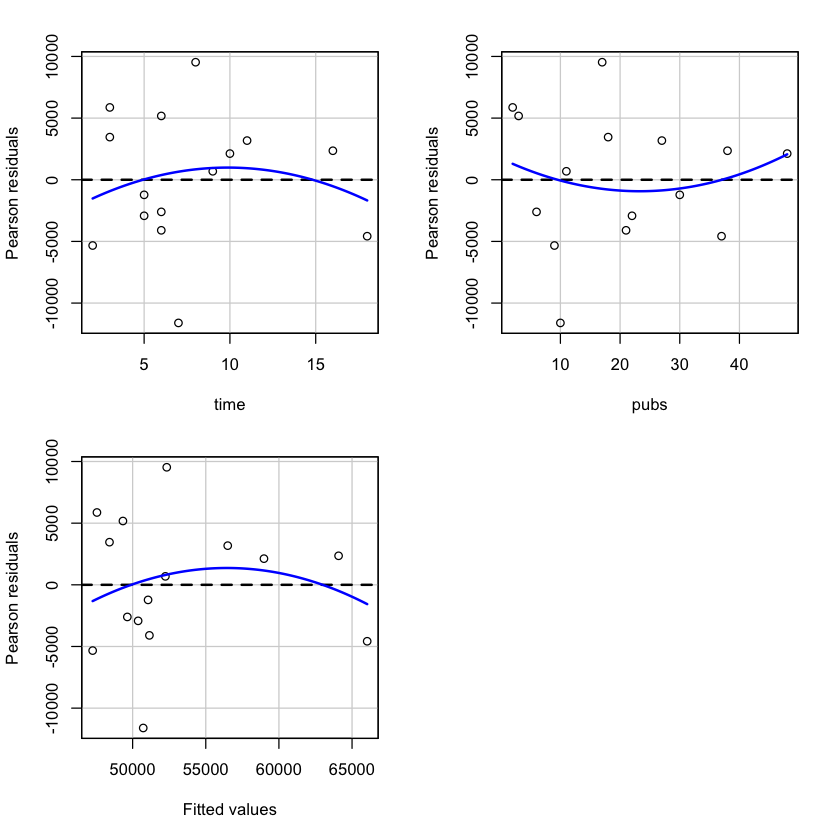

In [45]:
# regression diagnostics for mod2
library(car)

# plot the residuals against the fitted values
plot(mod2)

# plot the residuals against the fitted values with a package car
library(car)
residualPlots(mod2)

In [9]:
helping <- read_csv("data/altruism.csv")

Rows: 120 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): id, pho_1, pho_2, pho_3, sex, age, emp_q20, emp_q22, emp_q23, emp_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# summary of helping
summary(helping)

       id             pho_1            pho_2            pho_3       
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 30.75   1st Qu.: 60.50   1st Qu.: 62.50   1st Qu.: 50.00  
 Median : 60.50   Median : 76.00   Median : 77.00   Median : 66.50  
 Mean   : 60.50   Mean   : 70.89   Mean   : 70.25   Mean   : 61.58  
 3rd Qu.: 90.25   3rd Qu.: 94.50   3rd Qu.: 91.50   3rd Qu.: 84.25  
 Max.   :120.00   Max.   :100.00   Max.   :100.00   Max.   :100.00  
                  NA's   :1        NA's   :1        NA's   :2       
      sex             age           emp_q20          emp_q22      
 Min.   :0.000   Min.   :  203   Min.   :  0.00   Min.   :  6.00  
 1st Qu.:0.000   1st Qu.: 2003   1st Qu.: 62.50   1st Qu.: 65.25  
 Median :1.000   Median : 2003   Median : 80.00   Median : 80.00  
 Mean   :0.678   Mean   : 2100   Mean   : 78.24   Mean   : 78.27  
 3rd Qu.:1.000   3rd Qu.: 2004   3rd Qu.: 91.50   3rd Qu.: 93.00  
 Max.   :1.000   Max.   :20004   Max.   :100.0

In [11]:
# rename the column pho_1 to pho1, pho_2 to pho2, pho_3 to pho3
helping <- helping %>% rename(pho1 = pho_1, pho2 = pho_2, pho3 = pho_3)

# add a column pho to helping that is the average of pho1, pho2, and pho3 with na.rm = TRUE
helping <- helping %>% mutate(pho = mean(c(pho1, pho2, pho3), na.rm = TRUE))

In [15]:
helping["pho_mean2"] <- rowMeans(helping[, c("pho1", "pho2", "pho3")], na.rm = TRUE)
helping

id,pho1,pho2,pho3,sex,age,emp_q20,emp_q22,emp_q23,emp_q24,emp_q25,emp_q26,pho,pho_mean2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,95,95,95,1,2004,80,NA,80,80,70,70,67.58989,95.00000
2,58,62,NA,0,2003,62,58,59,57,56,59,67.58989,60.00000
3,100,50,50,NA,2003,90,51,51,51,52,100,67.58989,66.66667
4,77,77,64,1,2004,66,72,88,82,67,69,67.58989,72.66667
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
117,50,50,76,0,2003,52,100,0,26,48,45,67.58989,58.66667
118,92,76,94,0,1108,55,51,51,60,53,64,67.58989,87.33333
119,100,100,100,0,2004,68,75,55,72,75,63,67.58989,100.00000
120,60,78,26,0,2004,86,50,5,50,100,90,67.58989,54.66667


In [20]:
helping["pho_mean3"] <-    # "phone"이라는 새로운 변수에 assign!
  helping |>
  select(pho1:pho3) |>
  rowMeans(na.rm = TRUE)

In [21]:
helping

id,pho1,pho2,pho3,sex,age,emp_q20,emp_q22,emp_q23,emp_q24,emp_q25,emp_q26,pho,pho_mean2,pho_mean3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,95,95,95,1,2004,80,NA,80,80,70,70,67.58989,95.00000,95.00000
2,58,62,NA,0,2003,62,58,59,57,56,59,67.58989,60.00000,60.00000
3,100,50,50,NA,2003,90,51,51,51,52,100,67.58989,66.66667,66.66667
4,77,77,64,1,2004,66,72,88,82,67,69,67.58989,72.66667,72.66667
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
117,50,50,76,0,2003,52,100,0,26,48,45,67.58989,58.66667,58.66667
118,92,76,94,0,1108,55,51,51,60,53,64,67.58989,87.33333,87.33333
119,100,100,100,0,2004,68,75,55,72,75,63,67.58989,100.00000,100.00000
120,60,78,26,0,2004,86,50,5,50,100,90,67.58989,54.66667,54.66667


In [22]:
# load a dataset penguins from the palmerpenguins package
library(palmerpenguins)

# print the first 6 rows of penguins
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


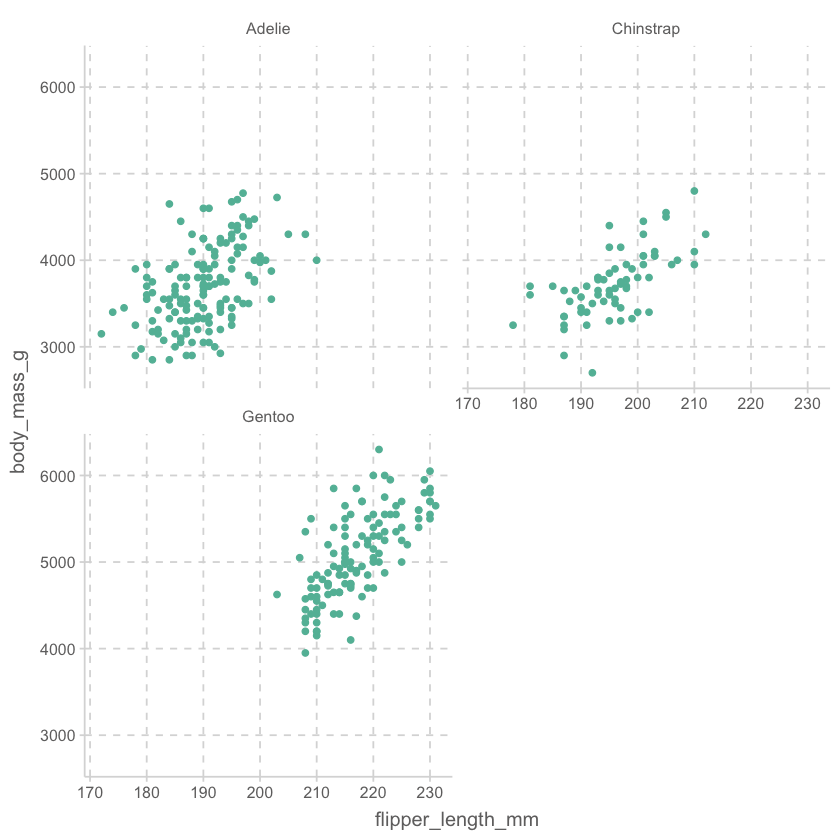

In [24]:
# draw a scatterplot of flipper length and body mass with penguins with a facet wrap of species, with a number of columns of 2
penguins %>% ggplot(aes(x = flipper_length_mm, y = body_mass_g)) + geom_point() + facet_wrap(~species, ncol = 2)

In [27]:
# Tukey's multiple comparison test of flipper length between species
TukeyHSD(aov(flipper_length_mm ~ species, data = penguins))


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = flipper_length_mm ~ species, data = penguins)

$species
                      diff       lwr       upr p adj
Chinstrap-Adelie  5.869887  3.586583  8.153191     0
Gentoo-Adelie    27.233349 25.334376 29.132323     0
Gentoo-Chinstrap 21.363462 19.000841 23.726084     0


In [35]:
# Tukey's multiple comparison test of flipper length between species using multicomp package, glht function
library(multcomp)
glht(aov(flipper_length_mm ~ species, data = penguins), linfct = mcp(species = "Tukey"))

# summary of the Tukey's multiple comparison test of flipper length between species using multicomp package, glht function
summary(glht(aov(flipper_length_mm ~ species, data = penguins), linfct = mcp(species = "Tukey")))

# Tukey's multiple comparison test of flipper length between species using emmeans package
library(emmeans)
emmeans(aov(flipper_length_mm ~ species, data = penguins), "species")




	 General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Linear Hypotheses:
                        Estimate
Chinstrap - Adelie == 0     5.87
Gentoo - Adelie == 0       27.23
Gentoo - Chinstrap == 0    21.36



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = flipper_length_mm ~ species, data = penguins)

Linear Hypotheses:
                        Estimate Std. Error t value Pr(>|t|)    
Chinstrap - Adelie == 0   5.8699     0.9699   6.052 1.06e-08 ***
Gentoo - Adelie == 0     27.2333     0.8067  33.760  < 1e-08 ***
Gentoo - Chinstrap == 0  21.3635     1.0036  21.286  < 1e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


 species   emmean    SE  df lower.CL upper.CL
 Adelie       190 0.540 339      189      191
 Chinstrap    196 0.805 339      194      197
 Gentoo       217 0.599 339      216      218

Confidence level used: 0.95 

In [39]:
# import the data from the file "data/students-shorter.sav" using haven package
library(haven)
students <- read_spss("data/students-shorter.sav")

# print the first 6 rows of students
head(students)

stu_id,sch_id,sstratid,sex,race,ethnic,bys42a,bys42b,bys44a,bys44b,⋯,f1s83,ffugrad,f1cncpt1,f1cncpt2,f1locus1,f1locus2,f1txrstd,f1txmstd,f1txsstd,f1txhstd
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>
124966,1249,1,2,4,1,3,4,2,4,⋯,3,5.25,-0.33,-0.10,0.03,-0.14,48.29,63.61,57.73,61.71
124972,1249,1,1,4,1,4,5,1,3,⋯,3,3.00,-0.33,-0.45,-0.43,-0.58,36.05,47.65,53.36,46.98
175551,1755,1,2,3,0,NA,3,2,3,⋯,2,2.50,0.42,0.33,-0.45,-0.59,55.13,43.44,46.39,50.48
180660,1806,1,1,4,1,2,NA,1,4,⋯,2,6.50,0.43,-0.02,0.03,0.07,42.54,56.19,40.14,56.48
180672,1806,1,2,4,1,2,3,1,4,⋯,2,4.25,0.02,-0.09,-0.88,-0.85,52.96,47.36,46.01,55.32
298885,2988,2,1,3,0,5,4,2,3,⋯,2,6.00,-0.33,-0.28,0.03,0.07,44.24,45.25,41.88,39.67
